<a href="https://colab.research.google.com/github/Heartz00/MyHamoyeStagestag_alongCode/blob/master/StageETagalongcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STAGE E - TIME SERIES PREDICTION

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Get familiar with the data.

In [3]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#convertinf the FullDate column to date_time format
df['FullDate']=pd.to_datetime(df['FullDate'])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.shape

(92016, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [7]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
#change the name of the date and electric price column to ds and y respectively
df=df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Downsample the dataset, aggregating the time from hourly to daily

In [9]:
#using the daily sampling rate(sum)
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [10]:
df_daily.reset_index(inplace=True)
df_daily.shape

(3834, 5)

In [11]:
df_daily.columns

Index(['ds', 'Tmax', 'SysLoad', 'GasPrice', 'y'], dtype='object')

Question 11- a plot of ElecPrice over time

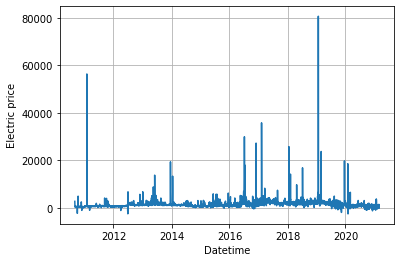

In [12]:
plt.plot(df_daily['ds'], df_daily['y'])
plt.xlabel('Datetime')
plt.ylabel('Electric price')
plt.grid()
plt.show()

Question 12-13

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print('p-value of sysload {:.6f}'.format(adf_result[1]))#p-value
print('critical value{} '.format(adf_result[4]))#critical value

p-value of sysload 0.004254
critical value{'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499} 


In [14]:
from statsmodels.tsa.stattools import adfuller
adf_result1 = adfuller(df_daily['GasPrice'])
print('p-value of Gas price {:.6f}'.format(adf_result1[1]))#p-value
print('critical value{} '.format(adf_result1[4]))#critical value

p-value of Gas price 0.045027
critical value{'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323} 


In [15]:
from statsmodels.tsa.stattools import adfuller
adf_result1 = adfuller(df_daily['y'])
print('p-value of Elec price {:.6f}'.format(adf_result1[1]))#p-value
print('critical value{} '.format(adf_result1[4]))#critical value

p-value of Elec price 0.000000
critical value{'1%': -3.432066157296446, '5%': -2.8622983040036005, '10%': -2.5671736550459663} 


TRAIN TEST SPLIT

In [16]:
#splitting into train and test datasets
df_train = df_daily.iloc[:2757, :]
df_test = df_daily.iloc[2757:, :]
print(f'The shape of the train is : {df_train.shape} ')
print(f'The shape of the test is : {df_test.shape} ')

The shape of the train is : (2757, 5) 
The shape of the test is : (1077, 5) 


For questions 14-16, using the ds(daily time) and the electric price(y)only.

In [17]:
#For questions 14-16
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
#prediction
#for predicting 10 days into the future, untag the code below
#future = model.make_future_dataframe(periods=10, freq='D')
forecast=model.predict(df_test.drop(columns='y'))
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,65.056959,4737.323699,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,338.381014,5234.864713,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,432.854841,5373.764880,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,220.181085,4891.798209,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-66.647530,4778.408099,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [19]:
from sklearn.metrics import mean_absolute_error as mae, mean_absolute_percentage_error as MAPE, mean_squared_error as mse
mae(df_test['y'], forecast['yhat'])

1748.5192459342127

In [20]:
mape=MAPE(df_test['y'], forecast['yhat'])*100
mape.round(2)

549.48

In [21]:
import math
MSE=mse(df_test['y'], forecast['yhat'])
rmse= math.sqrt(MSE)
rmse

3218.15577651241

<function matplotlib.pyplot.show(*args, **kw)>

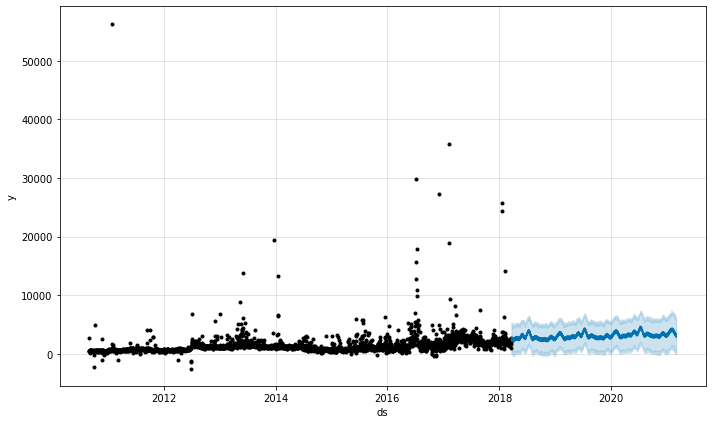

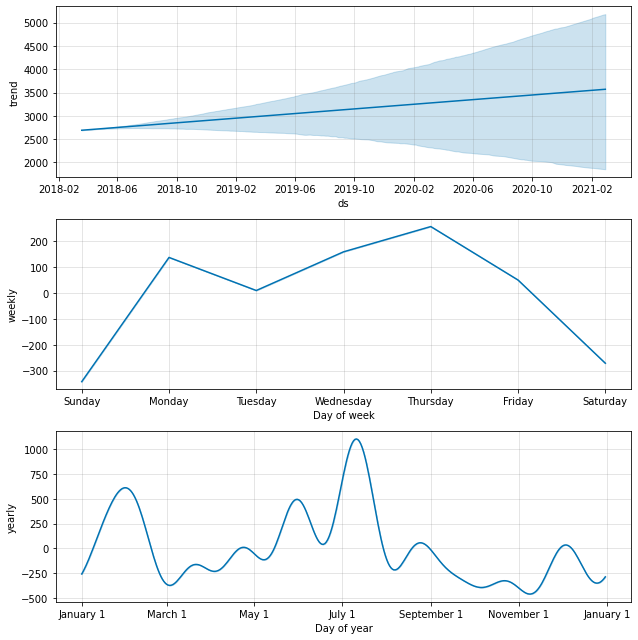

In [22]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
model.plot_components(forecast)
plt.show

For question 17-19

Multivariate time series model


In [23]:
#change the name of the columns
df_train2 = df_train.rename(columns={'Tmax':'add1', 'SysLoad':'add2', 'GasPrice':'add3'})
df_test2 = df_test.rename(columns={'Tmax':'add1', 'SysLoad':'add2', 'GasPrice':'add3'})

In [24]:
df_train2.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
#train the prophet model
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.fit(df_train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
y_pred = m.predict(df_test2.drop(columns="y"))
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1871.973934,-262.252930,4194.817853,1871.973934,1871.973934,0.227060,0.227060,0.227060,-856.150464,...,-84.540325,-84.540325,-84.540325,-38.308232,-38.308232,-38.308232,0.0,0.0,0.0,1996.263797
1,2018-03-21,1872.686560,-56.849678,4222.546104,1872.686560,1872.686560,0.224366,0.224366,0.224366,-1026.118333,...,42.348258,42.348258,42.348258,-28.919500,-28.919500,-28.919500,0.0,0.0,0.0,1987.793424
2,2018-03-22,1873.399186,740.388683,4944.785772,1873.399186,1873.399186,0.211312,0.211312,0.211312,-214.901804,...,145.553452,145.553452,145.553452,-23.789279,-23.789279,-23.789279,0.0,0.0,0.0,2908.044941
3,2018-03-23,1874.111813,396.508822,4771.879699,1874.111813,1874.111813,0.203646,0.203646,0.203646,-274.824166,...,-44.344893,-44.344893,-44.344893,-22.777377,-22.777377,-22.777377,0.0,0.0,0.0,2592.194065
4,2018-03-24,1874.824439,-848.092205,3709.313485,1874.824439,1874.824439,0.201781,0.201781,0.201781,-1076.150262,...,-117.436652,-117.436652,-117.436652,-25.634138,-25.634138,-25.634138,0.0,0.0,0.0,1444.818422


In [27]:
mae_score = mae(df_test2['y'], y_pred['yhat'])
mae_score

1004.0052928566198

In [28]:
mape2 = MAPE(df_test2['y'], y_pred['yhat'])*100
mape2.round(2)

236.79

In [29]:
import math
MSE=mse(df_test2['y'], y_pred['yhat'])
rmse= math.sqrt(MSE)
rmse

2712.9883060633233

In [30]:
merge = pd.concat((y_pred['yhat'].reset_index(), df_test2['y'].reset_index()), axis =1)
merge.head()

,index,yhat,index,y
0,0,1996.263797,2757,1833.00
1,1,1987.793424,2758,1730.49
2,2,2908.044941,2759,2260.55
3,3,2592.194065,2760,2138.76
4,4,1444.818422,2761,1721.70


<function matplotlib.pyplot.show(*args, **kw)>

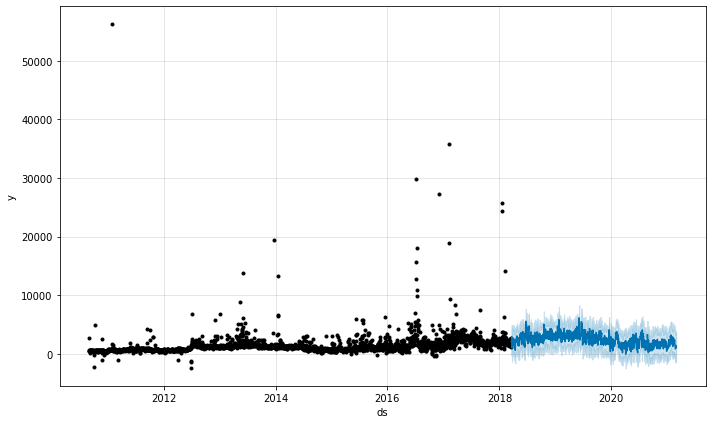

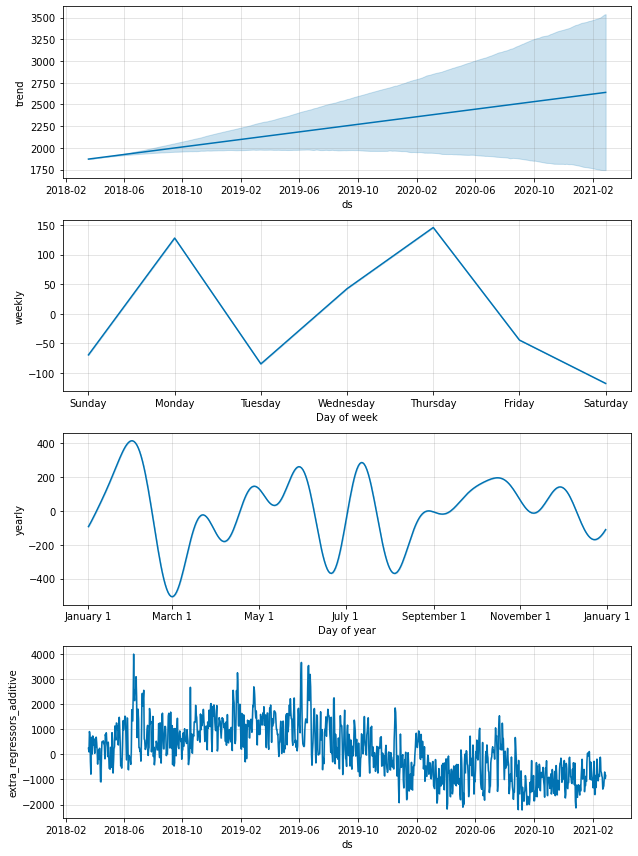

In [31]:
m.plot(y_pred)
m.plot_components(y_pred)
plt.show

Question 20

In [32]:
#train the model without the Tmax column
mo = Prophet()
mo.add_regressor('add2')
mo.add_regressor('add3')
mo.fit(df_train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
y_predd = mo.predict(df_test2.drop(columns="y"))
y_predd.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add2,add2_lower,add2_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1871.211040,-207.388517,4092.094016,1871.211040,1871.211040,-856.603121,-856.603121,-856.603121,1098.871250,...,-84.259077,-84.259077,-84.259077,-39.110445,-39.110445,-39.110445,0.0,0.0,0.0,1990.109647
1,2018-03-21,1871.907673,-260.263709,4103.785376,1871.907673,1871.907673,-1026.660854,-1026.660854,-1026.660854,1123.288383,...,42.767881,42.767881,42.767881,-29.814902,-29.814902,-29.814902,0.0,0.0,0.0,1981.488181
2,2018-03-22,1872.604305,730.019040,5103.934049,1872.604305,1872.604305,-215.015425,-215.015425,-215.015425,1123.288383,...,145.302341,145.302341,145.302341,-24.771961,-24.771961,-24.771961,0.0,0.0,0.0,2901.407643
3,2018-03-23,1873.300938,428.797942,4848.352874,1873.300938,1873.300938,-274.969469,-274.969469,-274.969469,1055.798726,...,-44.086683,-44.086683,-44.086683,-23.840330,-23.840330,-23.840330,0.0,0.0,0.0,2586.203182
4,2018-03-24,1873.997570,-792.054190,3697.863249,1873.997570,1873.997570,-1076.719235,-1076.719235,-1076.719235,786.015761,...,-117.847877,-117.847877,-117.847877,-26.769447,-26.769447,-26.769447,0.0,0.0,0.0,1438.676772


In [34]:
mape3 = MAPE(df_test2['y'], y_predd['yhat'])*100
mape3.round(2)

233.72